<a href="https://colab.research.google.com/github/5-621234/Apple-Stocks-Prediction/blob/main/APPLE_stocks_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
from pandas import DataFrame
import matplotlib.pyplot as plt

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error

get_ipython().run_line_magic('matplotlib', 'inline')

In [ ]:
import pandas as pd 
#import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/farhanhira/Stock-Market-Prediction-Using-Time-Series-Analysis/master/Dataset/AAPL.csv', parse_dates=['Date'])
df.head(5)


,Date,Open,High,Low,Close,Adj Close,Volume
0,1998-11-30,1.234375,1.243304,1.133929,1.140625,0.763834,140372400
1,1998-12-01,1.142857,1.243304,1.129464,1.218750,0.816152,216434400
2,1998-12-02,1.218750,1.316964,1.196429,1.285714,0.860995,240620800
3,1998-12-03,1.296875,1.303571,1.200893,1.203125,0.805688,156511600
4,1998-12-04,1.225446,1.229911,1.142857,1.169643,0.783266,180342400


In [ ]:
df= df[["Close"]].copy()
df.describe()

,Close
count,5033.000000
mean,48.470623
std,55.148818
min,0.937143
25%,3.194196
50%,22.840000
75%,84.618568
max,232.070007


In [ ]:
#for ARIMA model we have p,d,q
#to check for stationarity, we use p value
from statsmodels.tsa.stattools import adfuller
result= adfuller(df.Close.dropna())
print(f"ADF Statistics: {result[0]}")
print(f"p-value: {result[1]}")


ADF Statistics: 0.8012933024738874
p-value: 0.9916570156929293


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

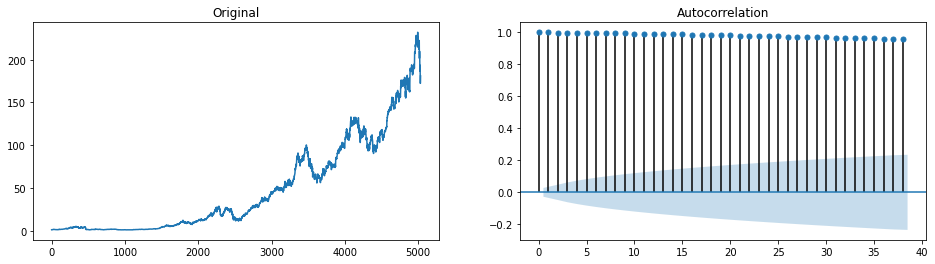

In [ ]:

import matplotlib.pyplot as plt
fig, (ax1, ax2)= plt.subplots(1, 2, figsize=(16,4))
ax1.plot(df.Close)
ax1.set_title("Original")
#add ; at end of plot function to avoid its duplicate
plot_acf(df.Close,ax=ax2);

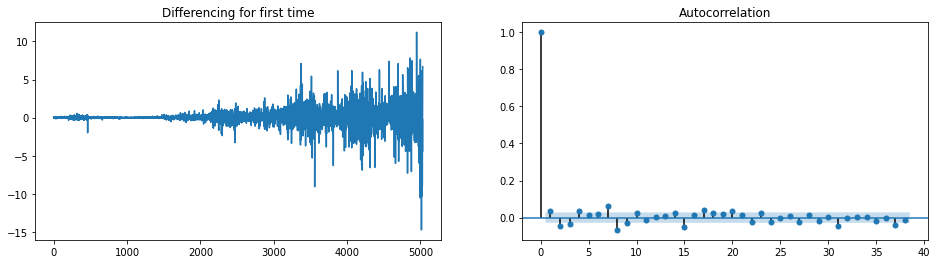

In [ ]:
import matplotlib.pyplot as plt
diff= df.Close.diff().dropna()
fig, (ax1, ax2)= plt.subplots(1, 2, figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Differencing for first time")
plot_acf(diff, ax=ax2);

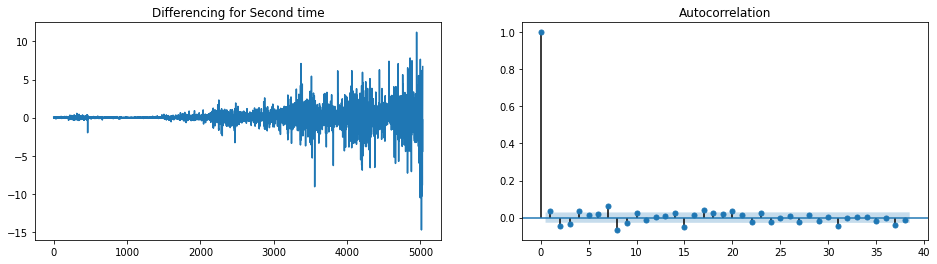

In [ ]:
import matplotlib.pyplot as plt
diff= df.Close.diff().dropna()
fig, (ax1, ax2)= plt.subplots(1, 2, figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Differencing for Second time")
plot_acf(diff, ax=ax2);

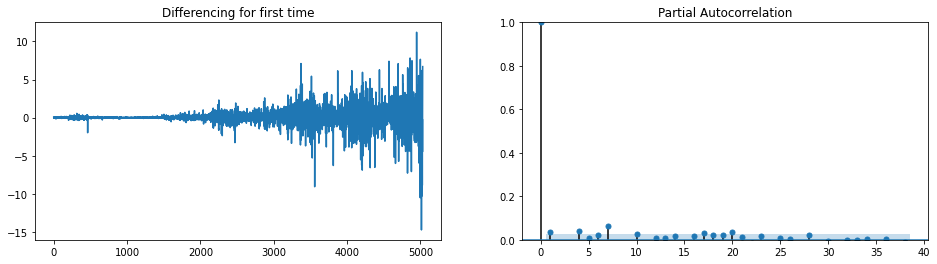

In [ ]:
# As there is no much difference the graph of differencing for 1 and 2 time, we will take d=1
#else series will become overdiffrenced 

# Now p ,is the order of AR term which refers to numbers of lags to be used as predicors
# we can find out the required number of AR terms by using PACF plot
# PACF represents the correlation between the series and its lags
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

diff= df.Close.diff().dropna()
fig, (ax1,ax2)= plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Differencing for first time")
ax2.set_ylim(0,1)
plot_pacf(diff, ax=ax2);

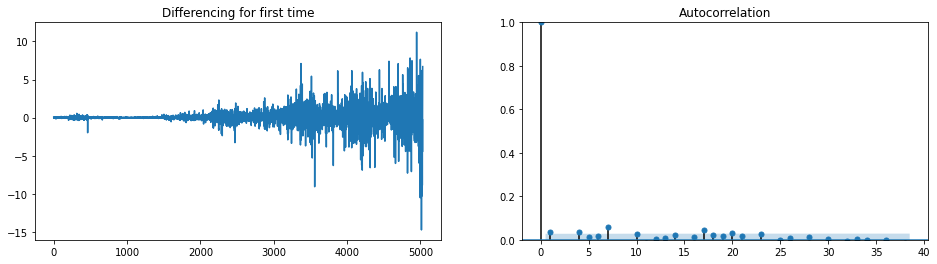

In [ ]:
#AS we can see from the previous PACF plot lag 7 is significant as it is above the significance line, we will use p=7
# q is the order of MA term which refers to the nu,ber of lagged forecast errors that should go into ARIMA model
# We can look at the ACF plot for number of MA terms

import matplotlib.pyplot as plt

diff= df.Close.diff().dropna()

fig, (ax1,ax2)= plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Differencing for first time")
ax2.set_ylim(0,1)
plot_acf(diff,ax=ax2);


In [ ]:
# Train and test split

n= int(len(df)*0.9)
model_predictions=[]
train= df.Close[:n]
test= df.Close[n:]
print(len(train))
print(len(test))



4529
504


In [ ]:
# from the previous graph we find q=1 suitable for our ARIMA model
#Fitting the ARIMA model
from statsmodels.tsa.arima_model import ARIMA
#ARIMA model
model= ARIMA(df.Close, order=(7,1,1))
result = model.fit(disp=0)
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 5032
Model:                 ARIMA(7, 1, 1)   Log Likelihood               -7789.424
Method:                       css-mle   S.D. of innovations              1.138
Date:                Thu, 20 Jan 2022   AIC                          15598.849
Time:                        11:52:37   BIC                          15664.084
Sample:                             1   HQIC                         15621.705
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0355      0.018      2.026      0.043       0.001       0.070
ar.L1.D.Close    -0.3402      0.093     -3.655      0.000      -0.523      -0.158
ar.L2.D.Close    -0.0303      0.015     

(array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.40340708,
         0.        ]]),
 array([-13.847876  , -11.36899042,  -8.89010484,  -6.41121927,
         -3.93233369,  -1.45344812,   1.02543746,   3.50432304,
          5.98320861,   8.46209419,  10.94097976]),
 <a list of 5032 Lists of Patches objects>)

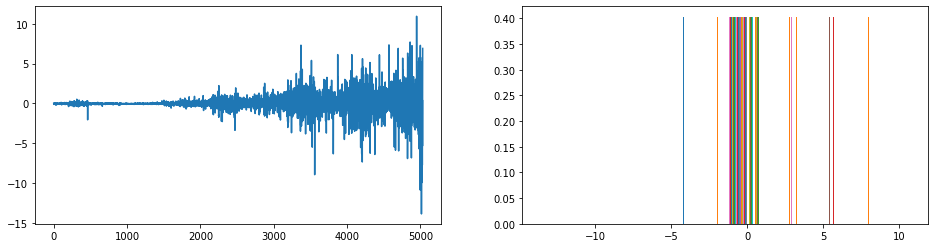

In [ ]:
#plot residual errors
import pandas as pd 
import matplotlib.pyplot as plt
residuals= pd.DataFrame(result.resid)
fig, (ax1, ax2)= plt.subplots(1,2, figsize=(16,4))
ax1.plot(residuals)
ax2.hist(residuals,density= True)

In [ ]:
# From graph , we find residuals are distributed around the mean of 0

In [ ]:
step= 504
# forecast: ndarray   array of out of sample forecast
# stderr: ndarray   array of standard error of forecast
# conf_int: ndarray  2d array of confidence interval for the forecast
fc, se ,conf= result.forecast(step)
fc


array([180.24446899, 179.55357663, 179.44625334, 179.45148199,
       179.87014951, 179.85381997, 180.41204716, 180.1705542 ,
       180.23427531, 180.23767853, 180.31751635, 180.37342007,
       180.40311318, 180.47492868, 180.47533066, 180.52540188,
       180.55384213, 180.59819837, 180.63165202, 180.66781977,
       180.70515962, 180.7376395 , 180.77534064, 180.80970199,
       180.84647985, 180.88130818, 180.91717889, 180.9526569 ,
       180.98803243, 181.02376678, 181.05915817, 181.0948341 ,
       181.13025279, 181.16585405, 181.20135058, 181.23688931,
       181.27242954, 181.30794985, 181.34349435, 181.37901231,
       181.41455361, 181.45007819, 181.48561286, 181.52114293,
       181.556674  , 181.59220589, 181.62773588, 181.66326814,
       181.69879838, 181.73433012, 181.76986091, 181.80539219,
       181.84092329, 181.87645436, 181.91198558, 181.94751662,
       181.98304782, 182.01857889, 182.05411006, 182.08964117,
       182.1251723 , 182.16070343, 182.19623455, 182.23

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import math
mse = mean_squared_error(test, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test)/np.abs(test))
print('MAPE: '+str(mape))

MSE: 1028.5775514447175
MAE: 27.60465161580451
RMSE: 32.07144448640749
MAPE: 0.18514457958270372


In [ ]:
#with MAPE 18.5%, we have accuracy 81.5%.

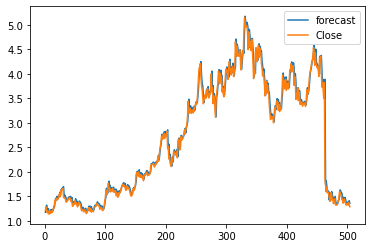

In [ ]:
# Actual vs Fitted
result.plot_predict(
    start=1,
    end=504,
    dynamic=False,
);